<a href="https://colab.research.google.com/github/BhavyaBansal49/Face-Recognition/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description:



### Setting up the environment

In [43]:
#Import libraries
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

In [36]:
#Functions that we will use to recognize the face
#Given an image, this function returns a rectangle for the detected face

def faceDetection(test_img):
  gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
  face_haar_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Project/Face Detection/haarcascade_frontalface_default.xml')
  faces = face_haar_cascade.detectMultiScale(gray_img, minNeighbors= 5)
  return faces, gray_img

In [37]:
#Give Labels to Training Images
#This function takes a directory path as input
def labels_for_training_images(directory):
  faces = []
  faceID = []
  for path, subdirnames, filenames in os.walk(directory):
    for filename in filenames:
      if filename.startswith('.'):
        print('Skipping the system file')
        continue
      id = os.path.basename(path)
      img_path = os.path.join(path, filename) #fetching the image path
      print('image path: ', img_path)
      test_img = cv2.imread(img_path) #loads the image 1 by 1 so it gets labeled
      if test_img is None:
        print('Image not loaded properly')
        continue
      faces_rect, gray_img = faceDetection(test_img)
      #calling the faceDetection function to return the rectangle
      if len(faces_rect)!= 1:
        continue #Since we are assuming only one person in an image

      (x, y, w, h) = faces_rect[0]
      roi_gray = gray_img[y:y+w, x:x+h] #cropping the region of interest
      faces.append(roi_gray)
      faceID.append(int(id))
  return faces, faceID

In [38]:
# Training the classifier model using training images
def train_classifier(faces, faceID):
  face_recognizer = cv2.face.LBPHFaceRecognizer_create()
  face_recognizer.train(np.array(faces), np.array(faceID))
  return face_recognizer

In [39]:
# Draw a rectangle around the face
def draw_rect(test_img, face):
  (x, y, w, h) = face
  cv2.rectangle(test_img, (x,y), (x+w, y+h), (255,0,0), thickness=5)

# Below function writes the name of the person in the image
def put_text(test_img, text, x,y):
  cv2.putText(test_img, text, (x,y), cv2.FONT_HERSHEY_DUPLEX, 2, (255,0,0),4)

Face Detected: [[458 626  58  58]]
Confidence:  110.09440288456658
Label:  0


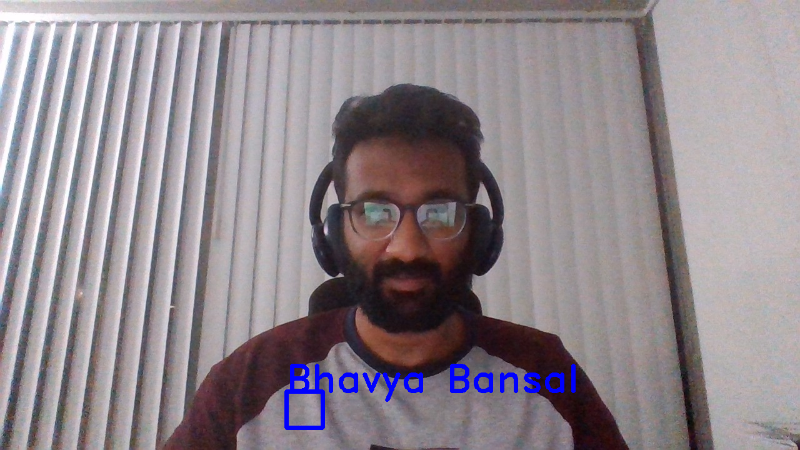

AttributeError: ignored

In [55]:
#
test_img = cv2.imread('/content/drive/MyDrive/Project/Face Detection/TestImages/Bhavya.jpg')
faces_detected, gray_img = faceDetection(test_img)
print('Face Detected:', faces_detected)

# Comment these lines when you are running the code from the second time
#faces, faceID = labels_for_training_images('/content/drive/MyDrive/Project/Face Detection/TrainingImages')
#face_recognizer = train_classifier(faces, faceID)
#face_recognizer.write('/content/drive/MyDrive/Project/Face Detection/trainingData.yml')

# Uncomment these lines while running the code from the second time onwards
face_recognizer = cv2.face.LBPHFaceRecognizer_create()
face_recognizer.read('/content/drive/MyDrive/Project/Face Detection/trainingData.yml')

# Name of the Person
name = {0: 'Bhavya Bansal'}

for face in faces_detected:
  (x, y, w, h) = face
  roi_gray = gray_img[y:y+h, x:x+h]
  label, confidence = face_recognizer.predict(roi_gray) #predicts the label of the image

  draw_rect(test_img, face)
  predicted_name = name[label]

  if (confidence>300):
    continue
  put_text(test_img, predicted_name, x, y)
  print('Confidence: ', confidence)
  print('Label: ', label)
  resized_img = cv2.resize(test_img, (800,450))
  cv2_imshow(resized_img)
  cv2.waitkey(0)
  cv2.destroyAllWindows